<h1>HEART DISEASE PREDICTION BASED ON PATIENT HEALTH STATUS<h1>

The data sample is very informative and is represented by 319 thousand patients on 18 criteria.

* HeartDisease - target trait.
* BMI - a value that allows you to assess the degree of correspondence between a person's mass and his height, and thereby indirectly judge whether the mass is insufficient, normal or excessive. 
* Smoking is a major risk factor for cardiovascular disease. 
* AlcoholDrinking - alcohol causes not only temporary disturbances in the functioning of the heart, but also permanent ones. 
* Stroke - One of the leading causes of this suffering is heart disease, which impairs its functioning, as a result of which the blood flow in the arteries is disturbed and the blood supply to the brain is reduced
* PhysicalHealth - how many days in a month did you feel poor physical health.
* MentalHealth - how many days in a month did you feel poor mental health.
* DiffWalking - difficulty climbing stairs.
* Sex - gender of a person.
* AgeCategory - age category of the subjects.
*Race
* Diabetic
* PhysicalActivity - adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* GenHealth - well-being.
* SleepTime - number of hours of sleep.
* Asthma
* KidneyDisease 
* Skin Cancer 

In [270]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [271]:
# Loading dataset
train = pd.read_csv('Patient_Info.csv')

Dividing the features based on their type nominal,ordinal and numeric(interval and ratio)

In [272]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
ordinal_categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'AgeCategory',
                              'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']
nominal_categorical_features=['Sex','Race']

<h2>Exploratory Data Analytics<h2>

<Axes: xlabel='HeartDisease', ylabel='count'>

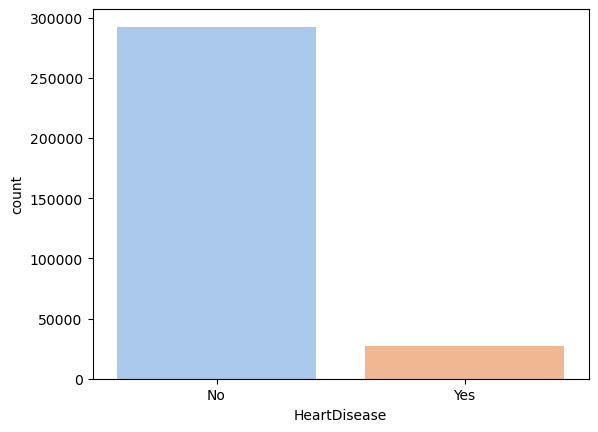

In [273]:
sns.countplot(x='HeartDisease',data=train,palette='pastel')

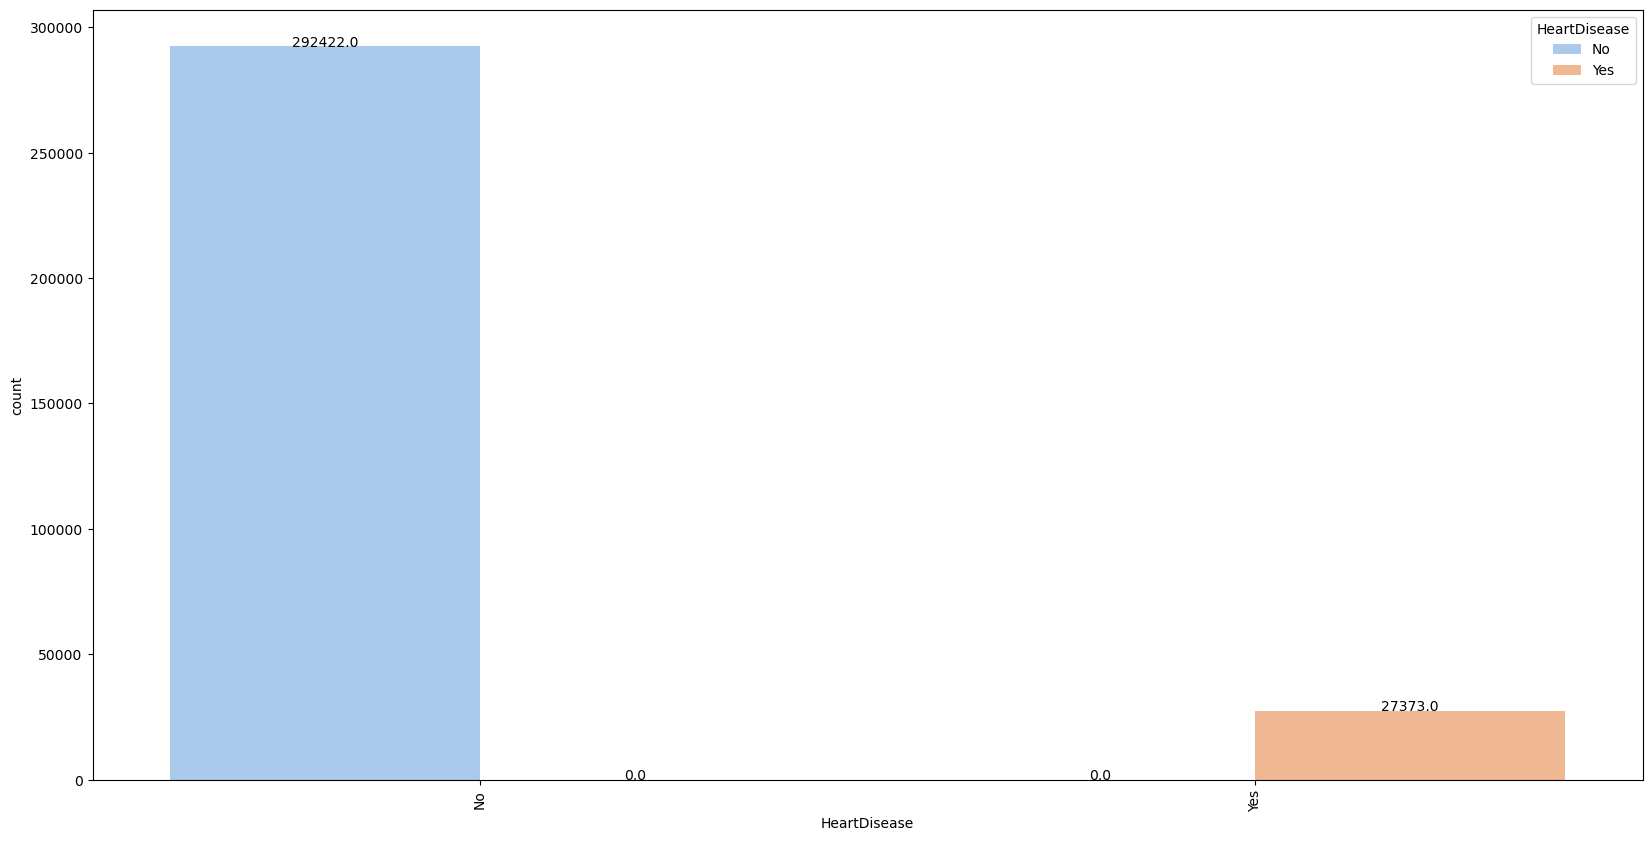

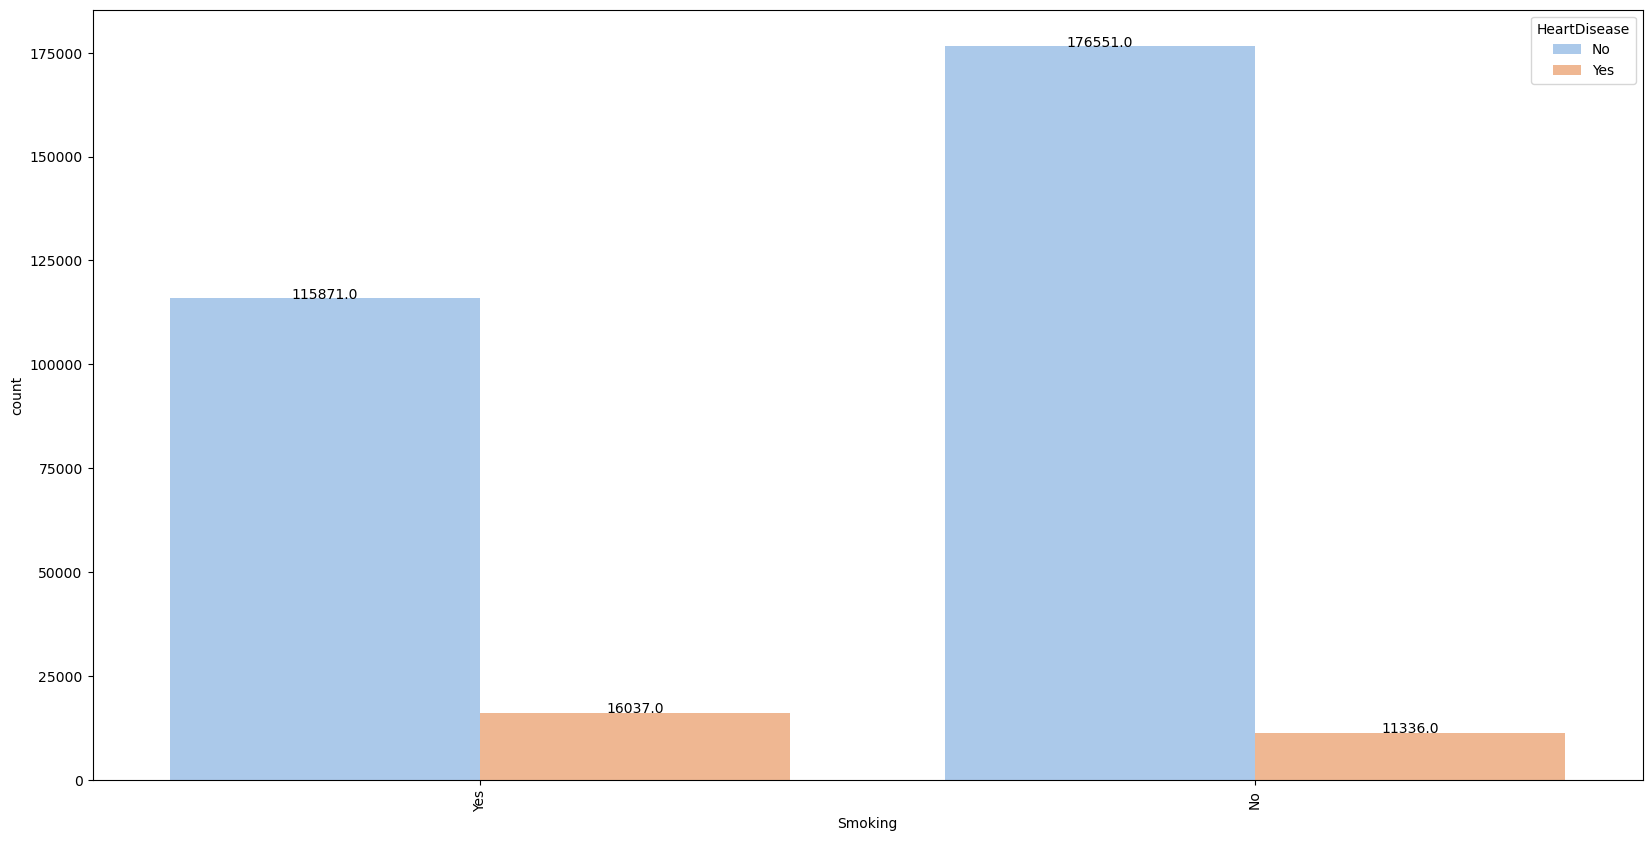

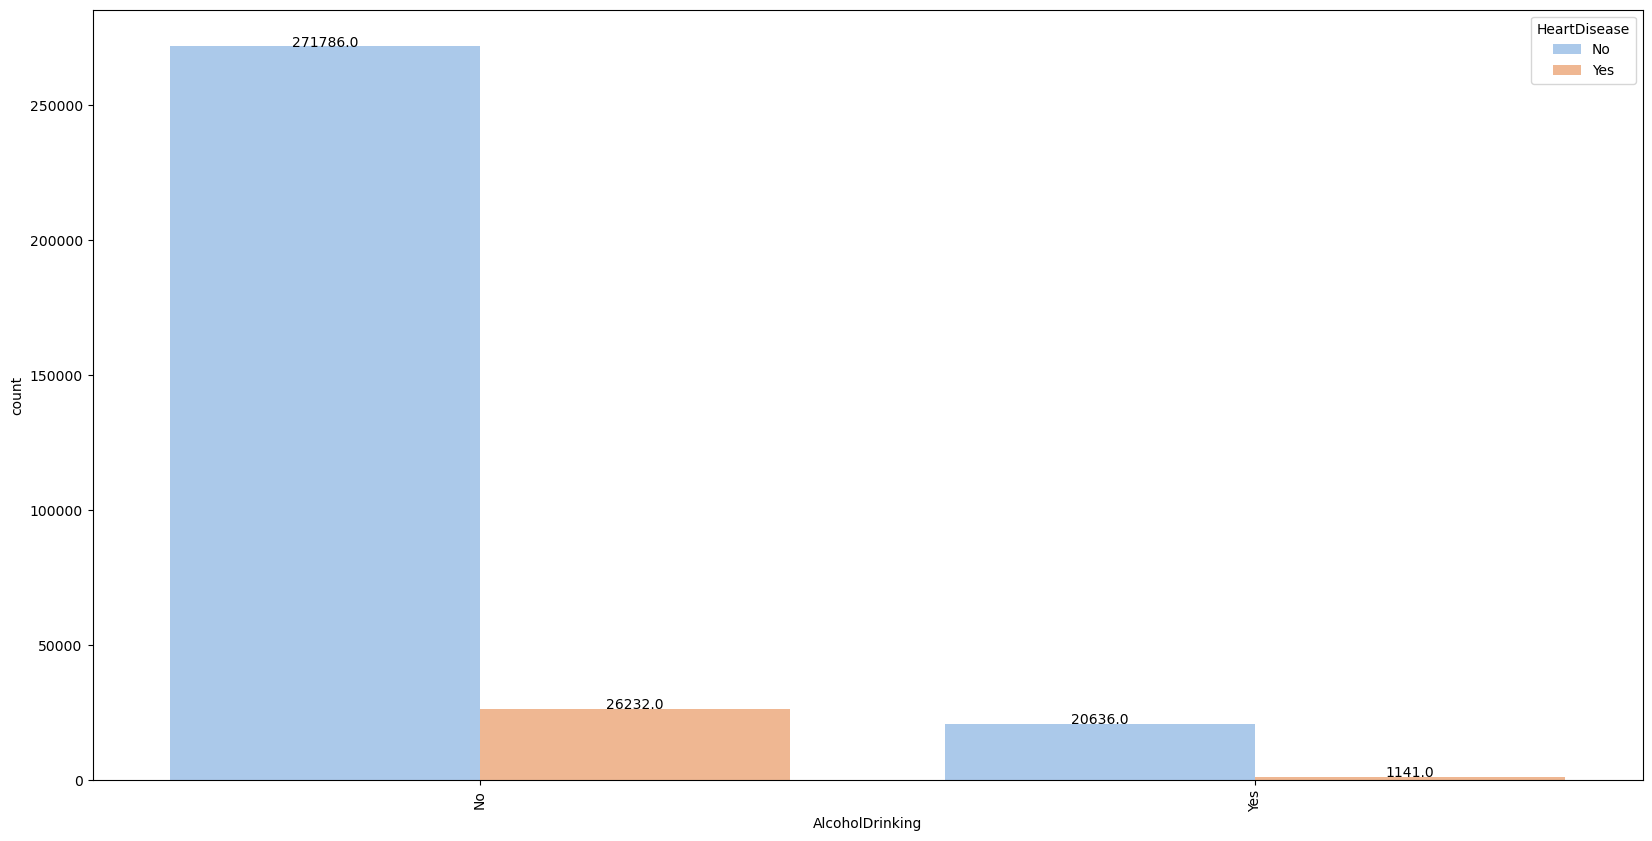

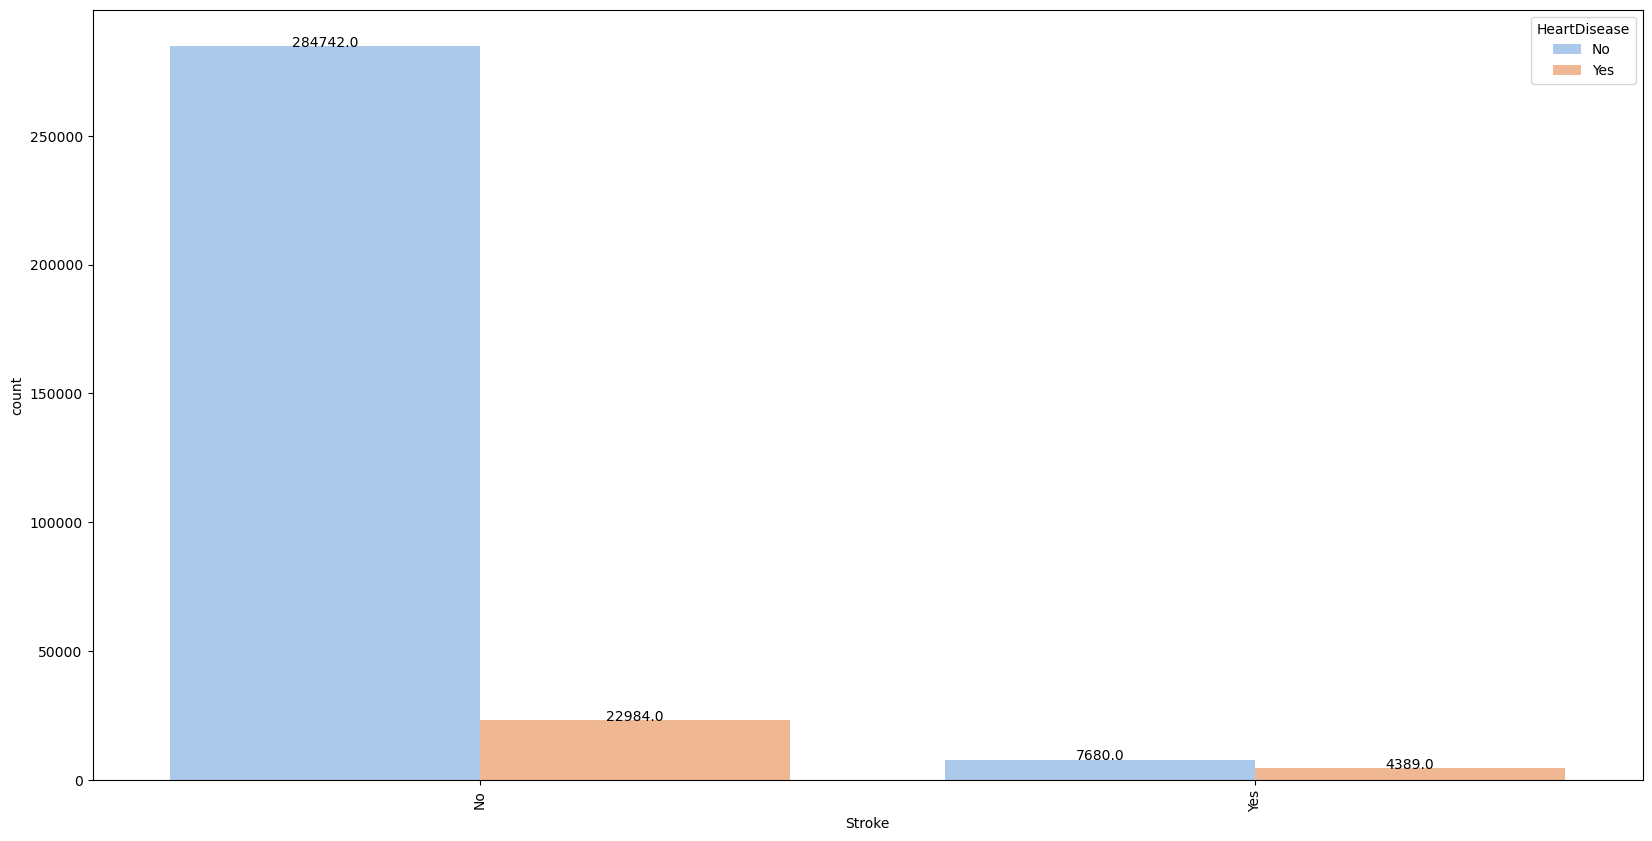

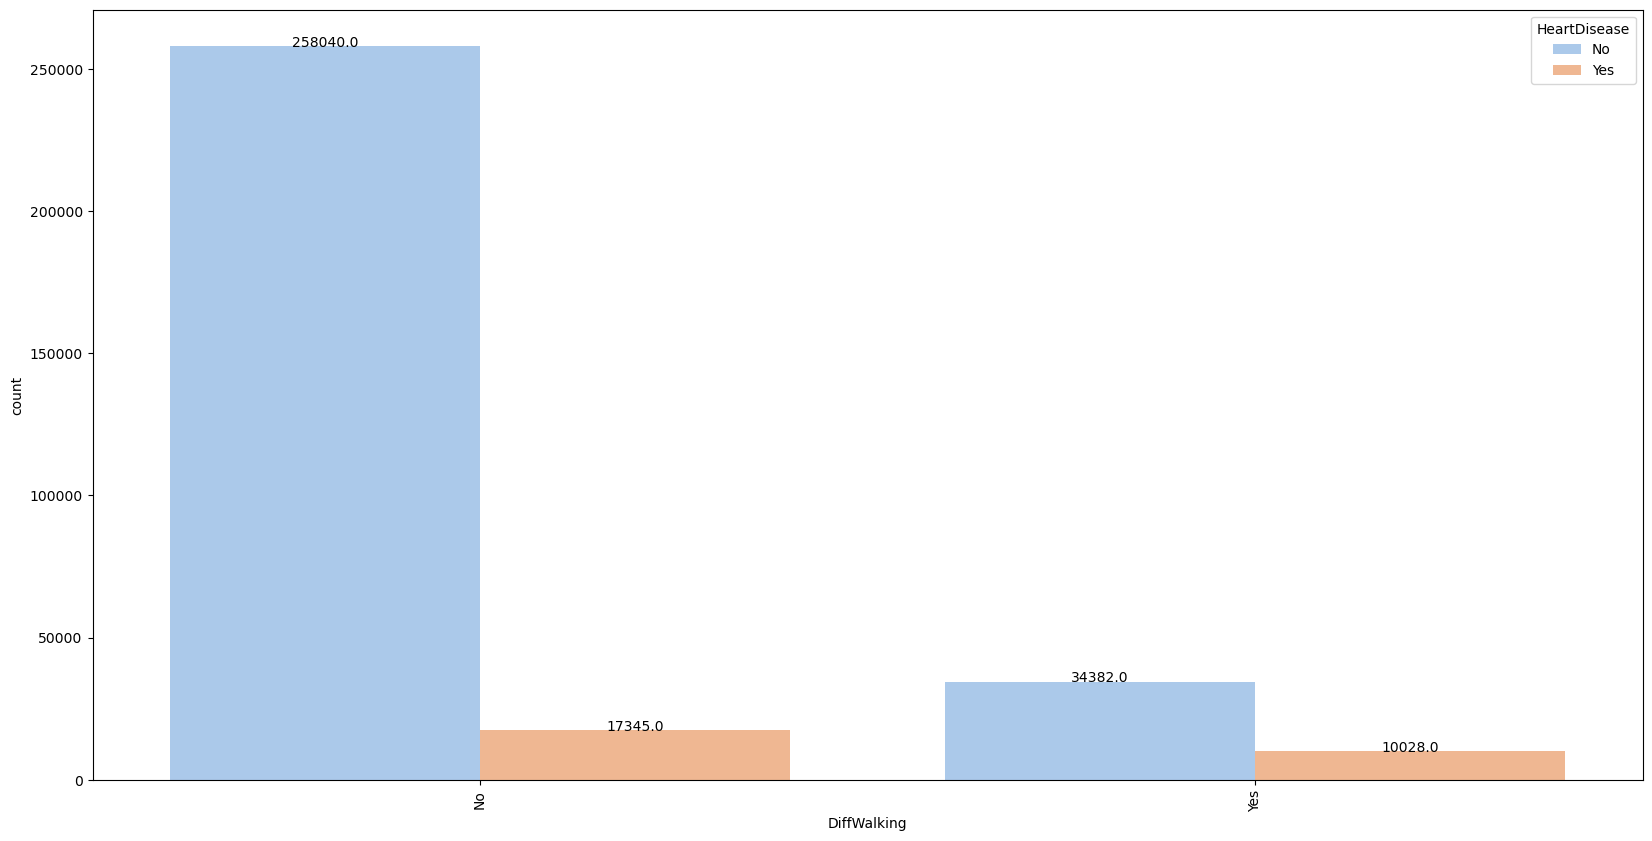

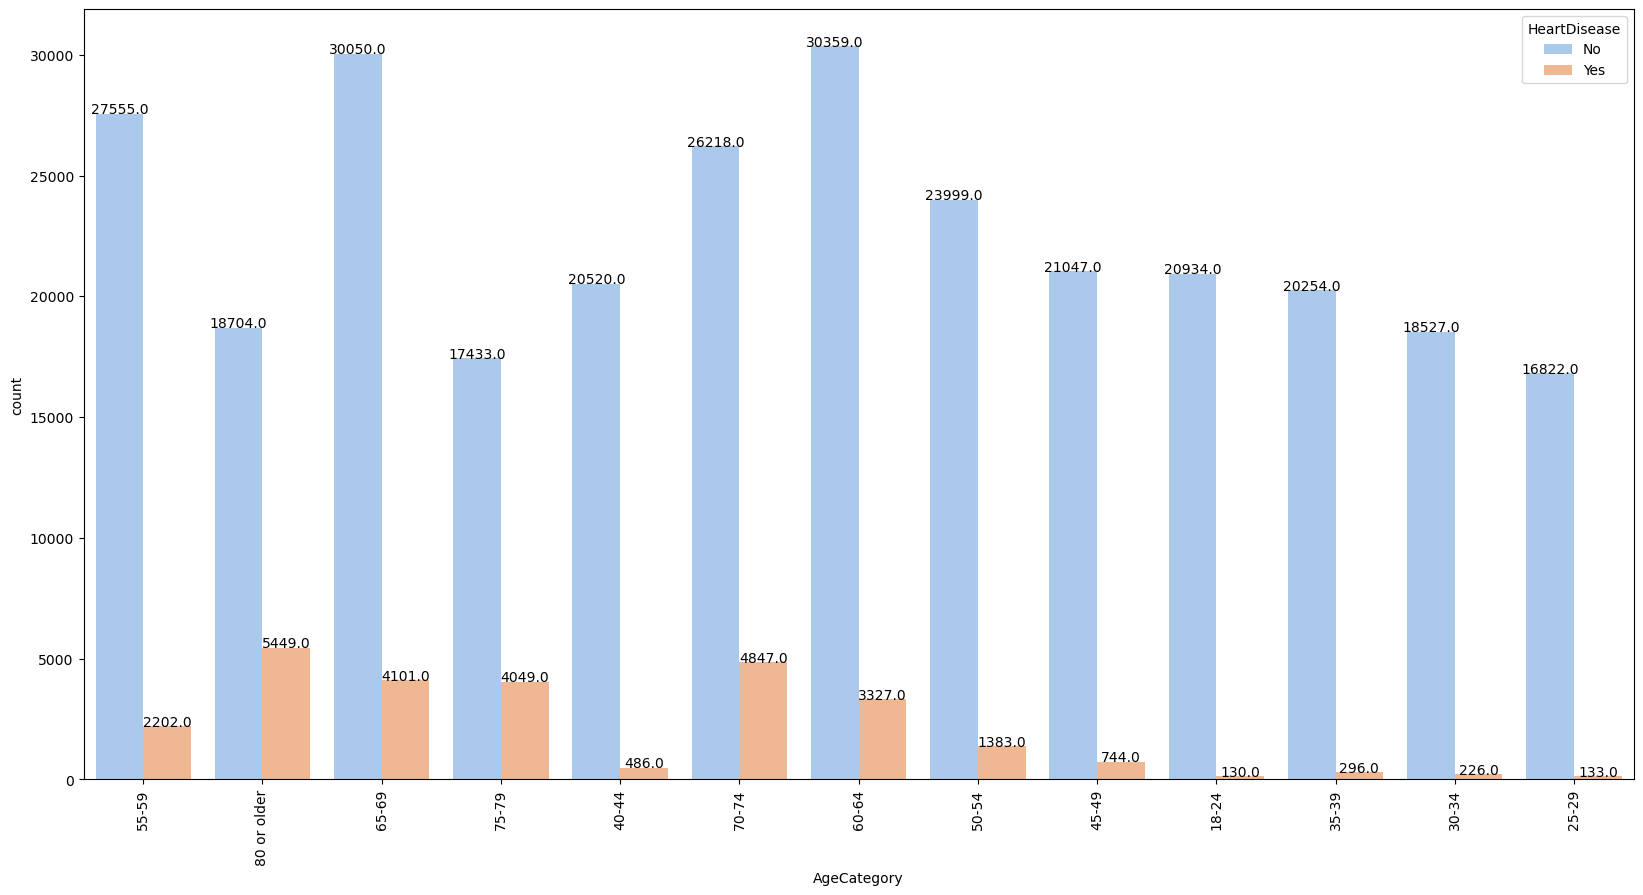

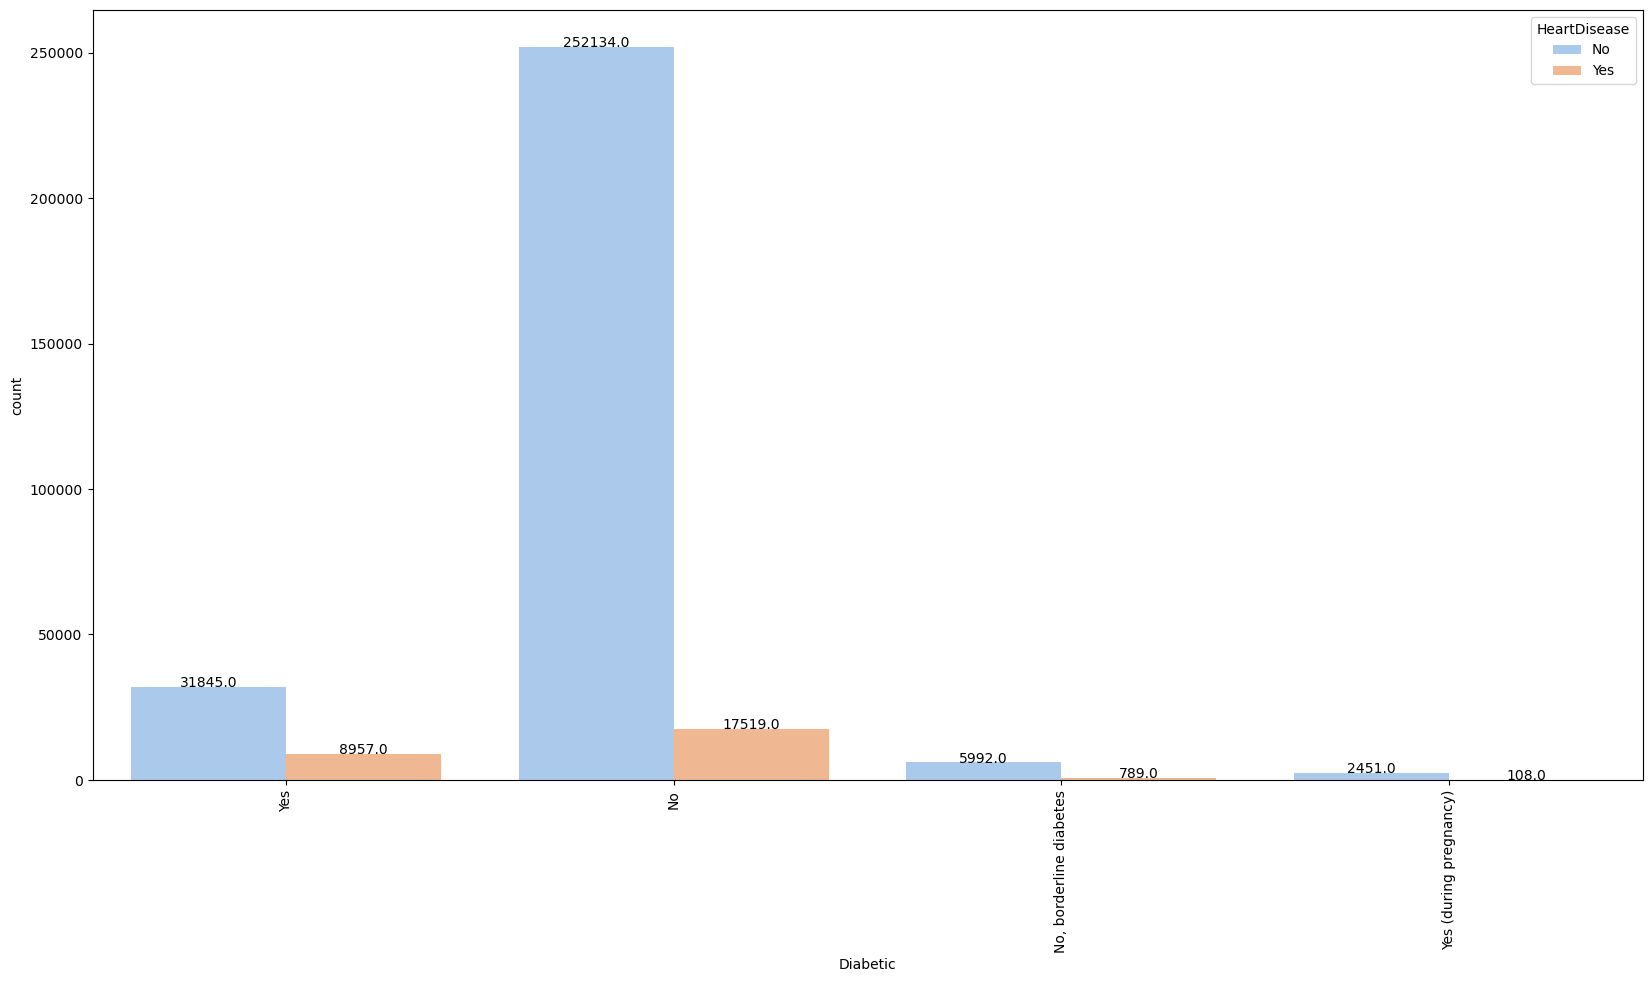

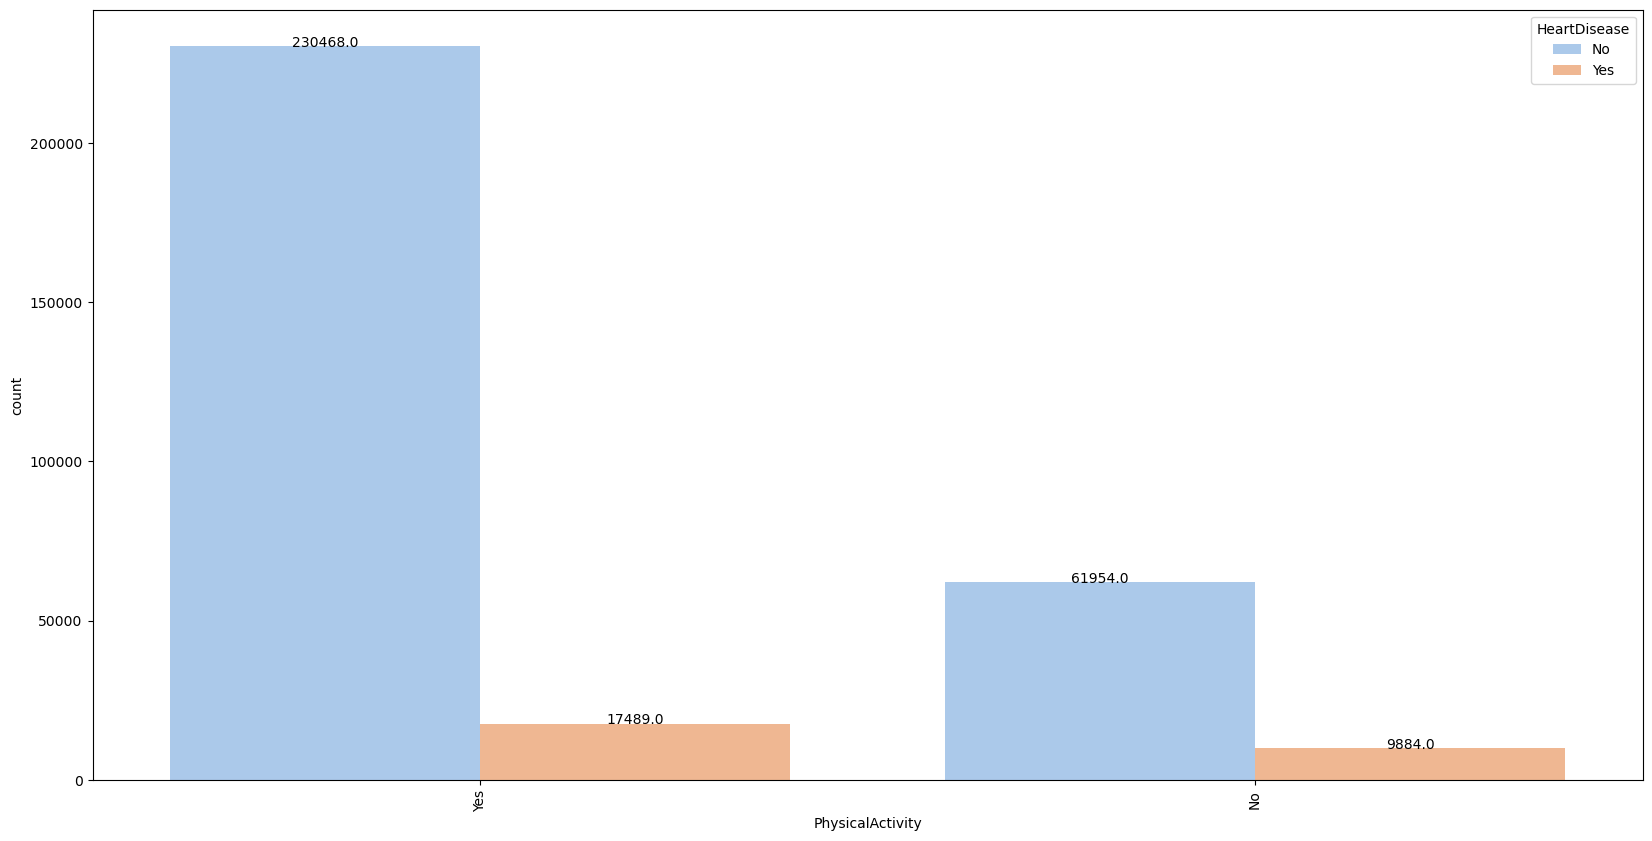

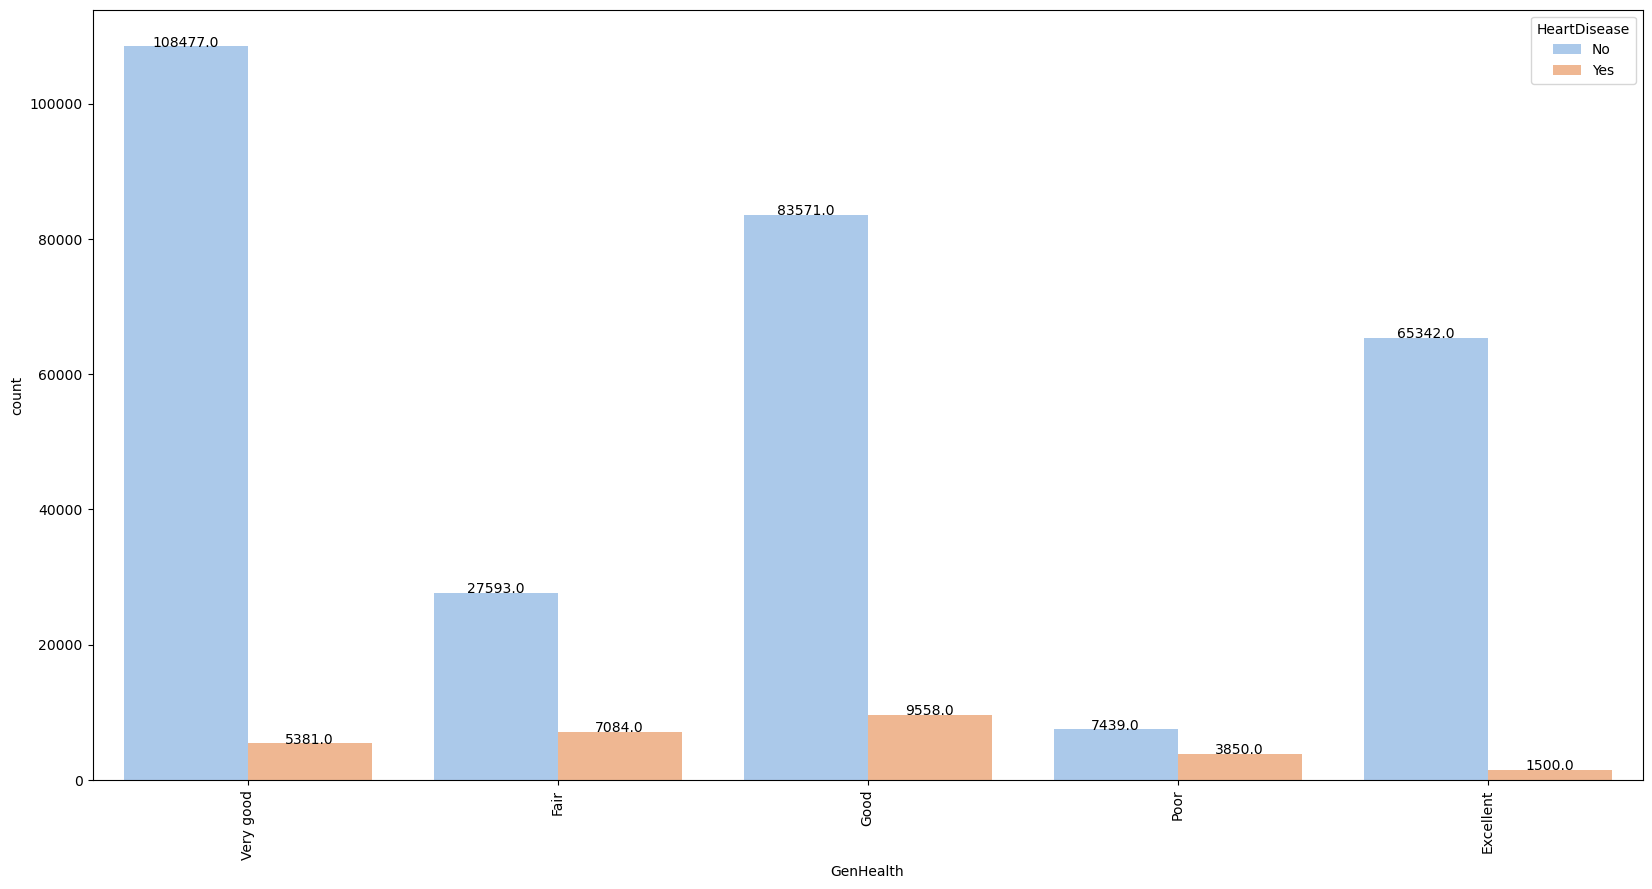

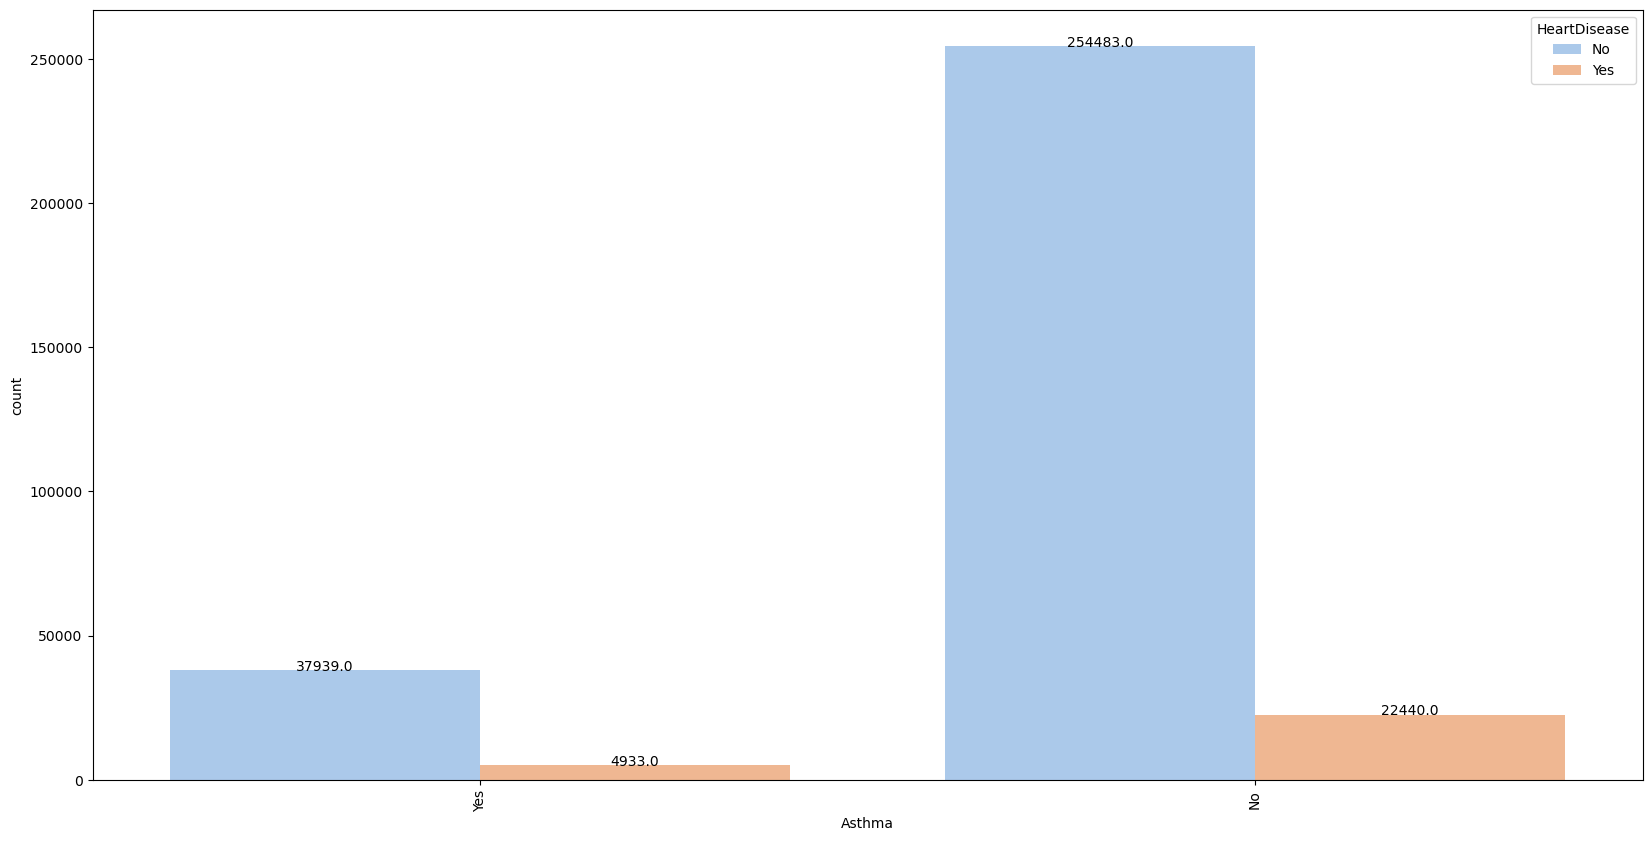

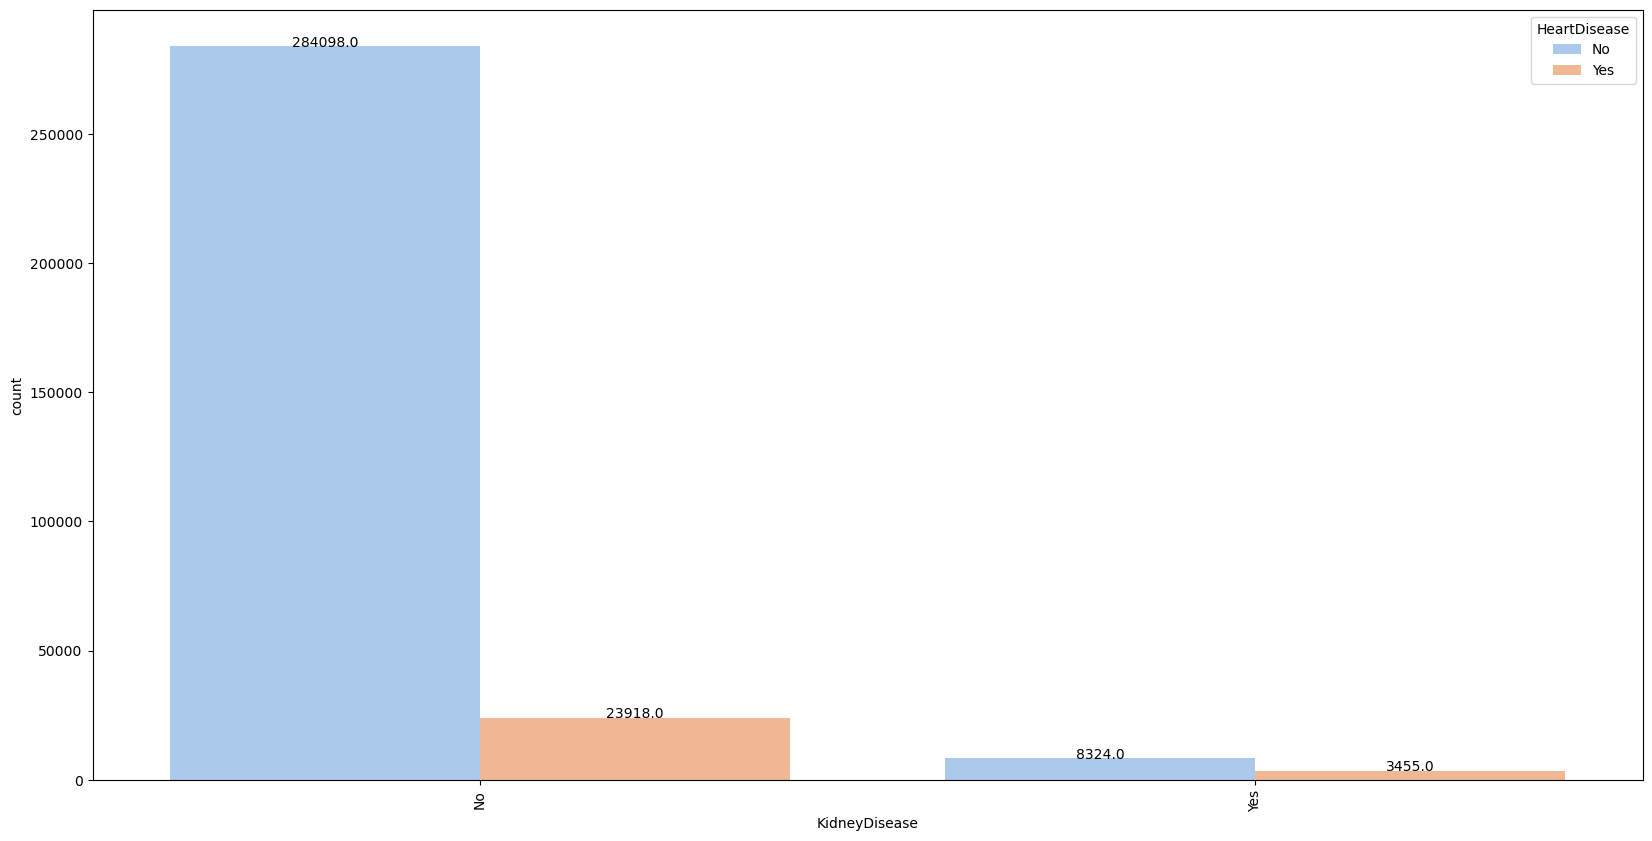

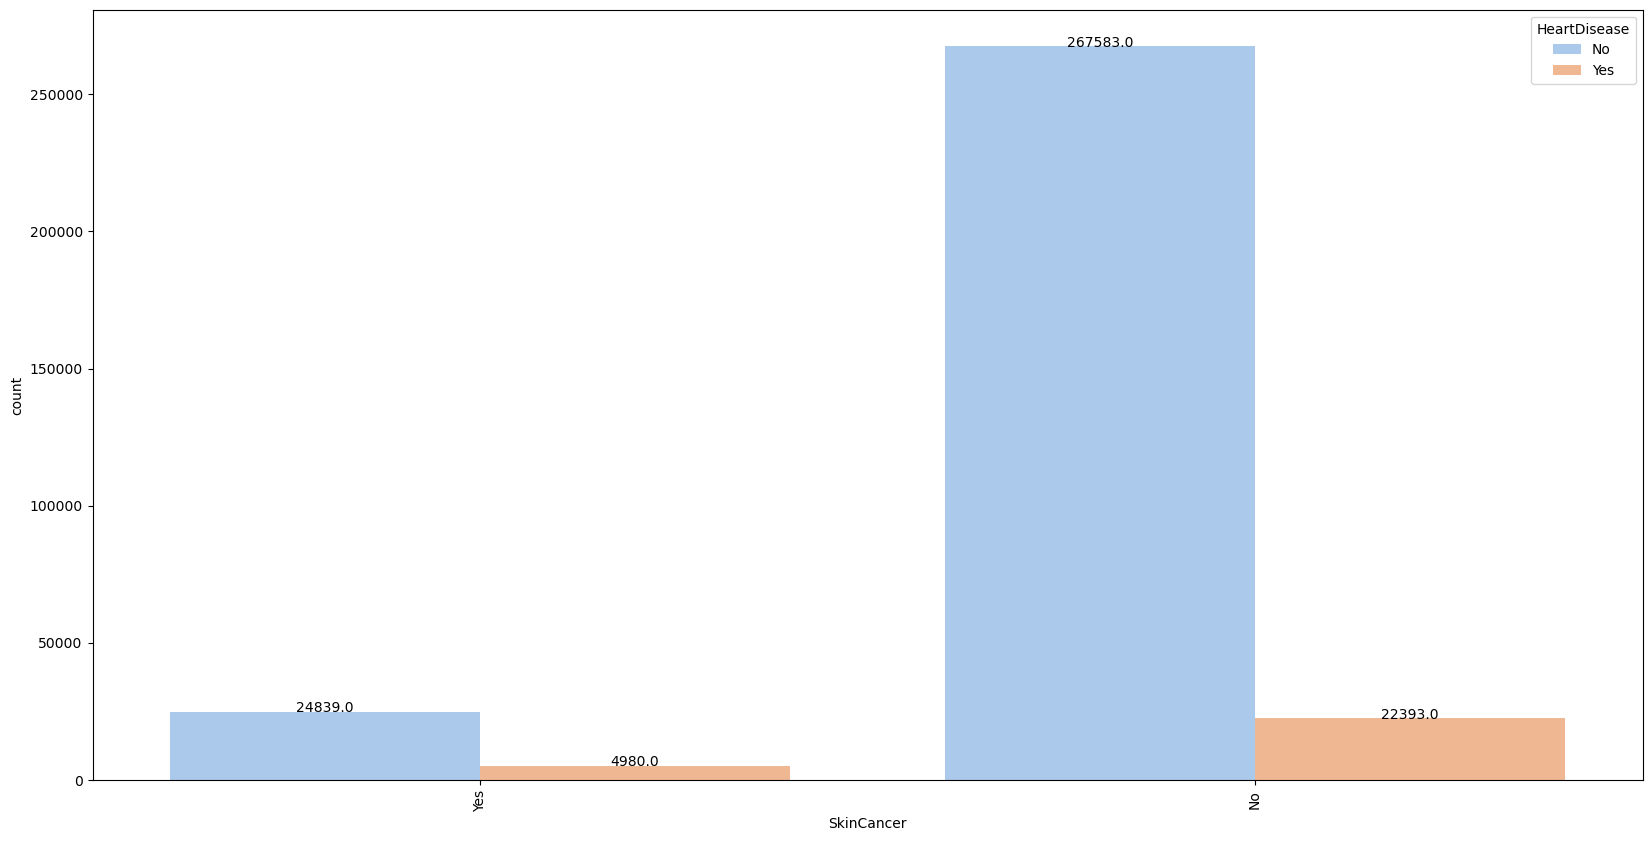

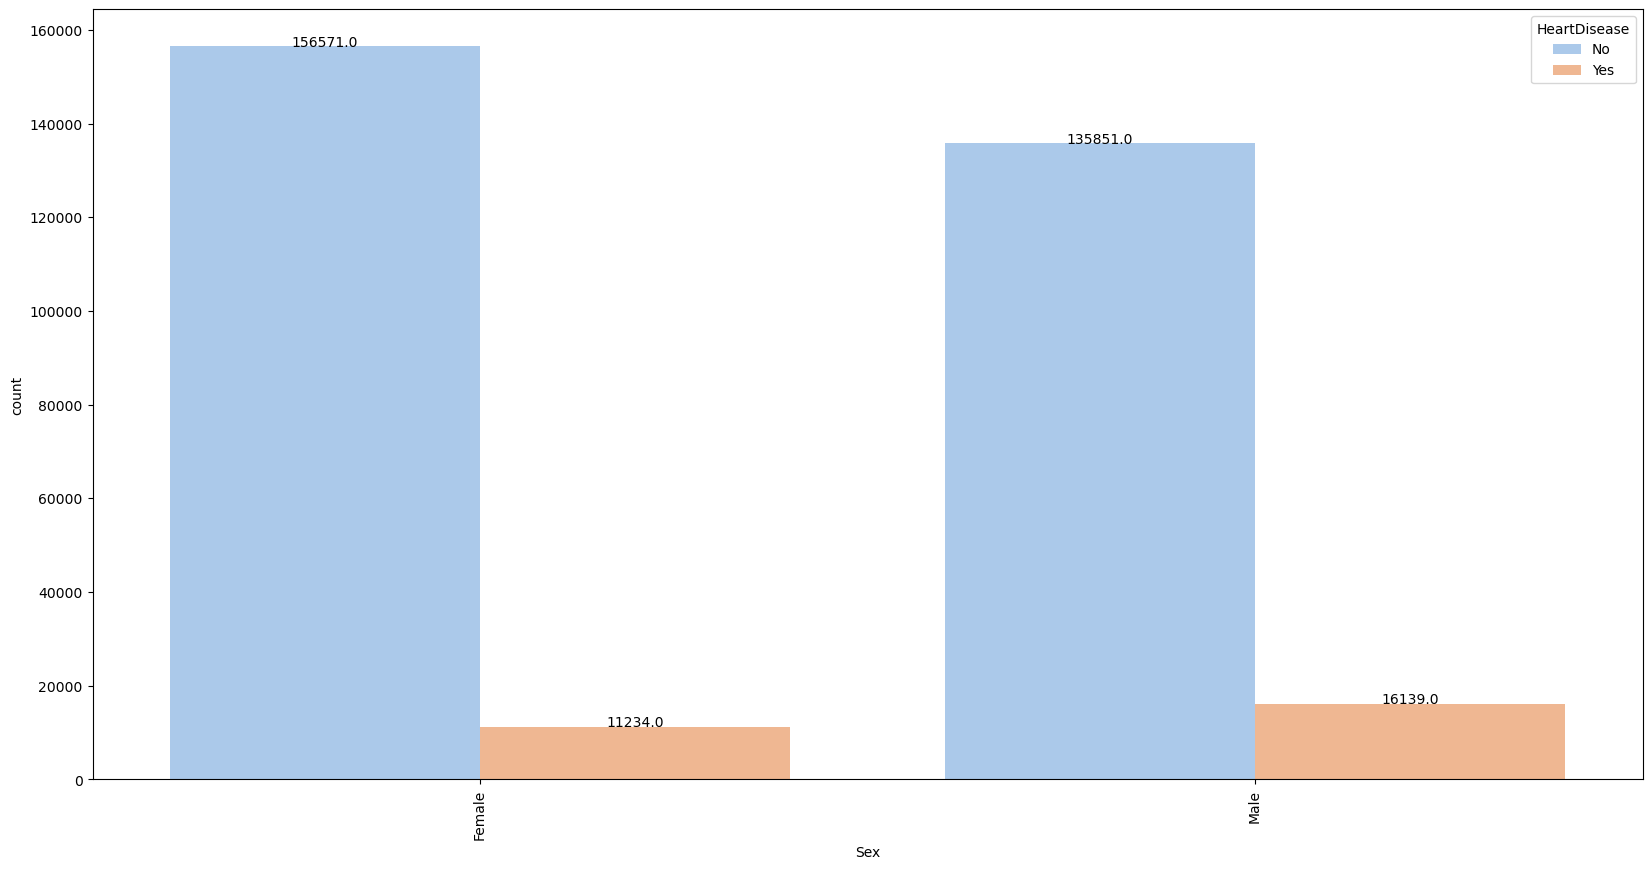

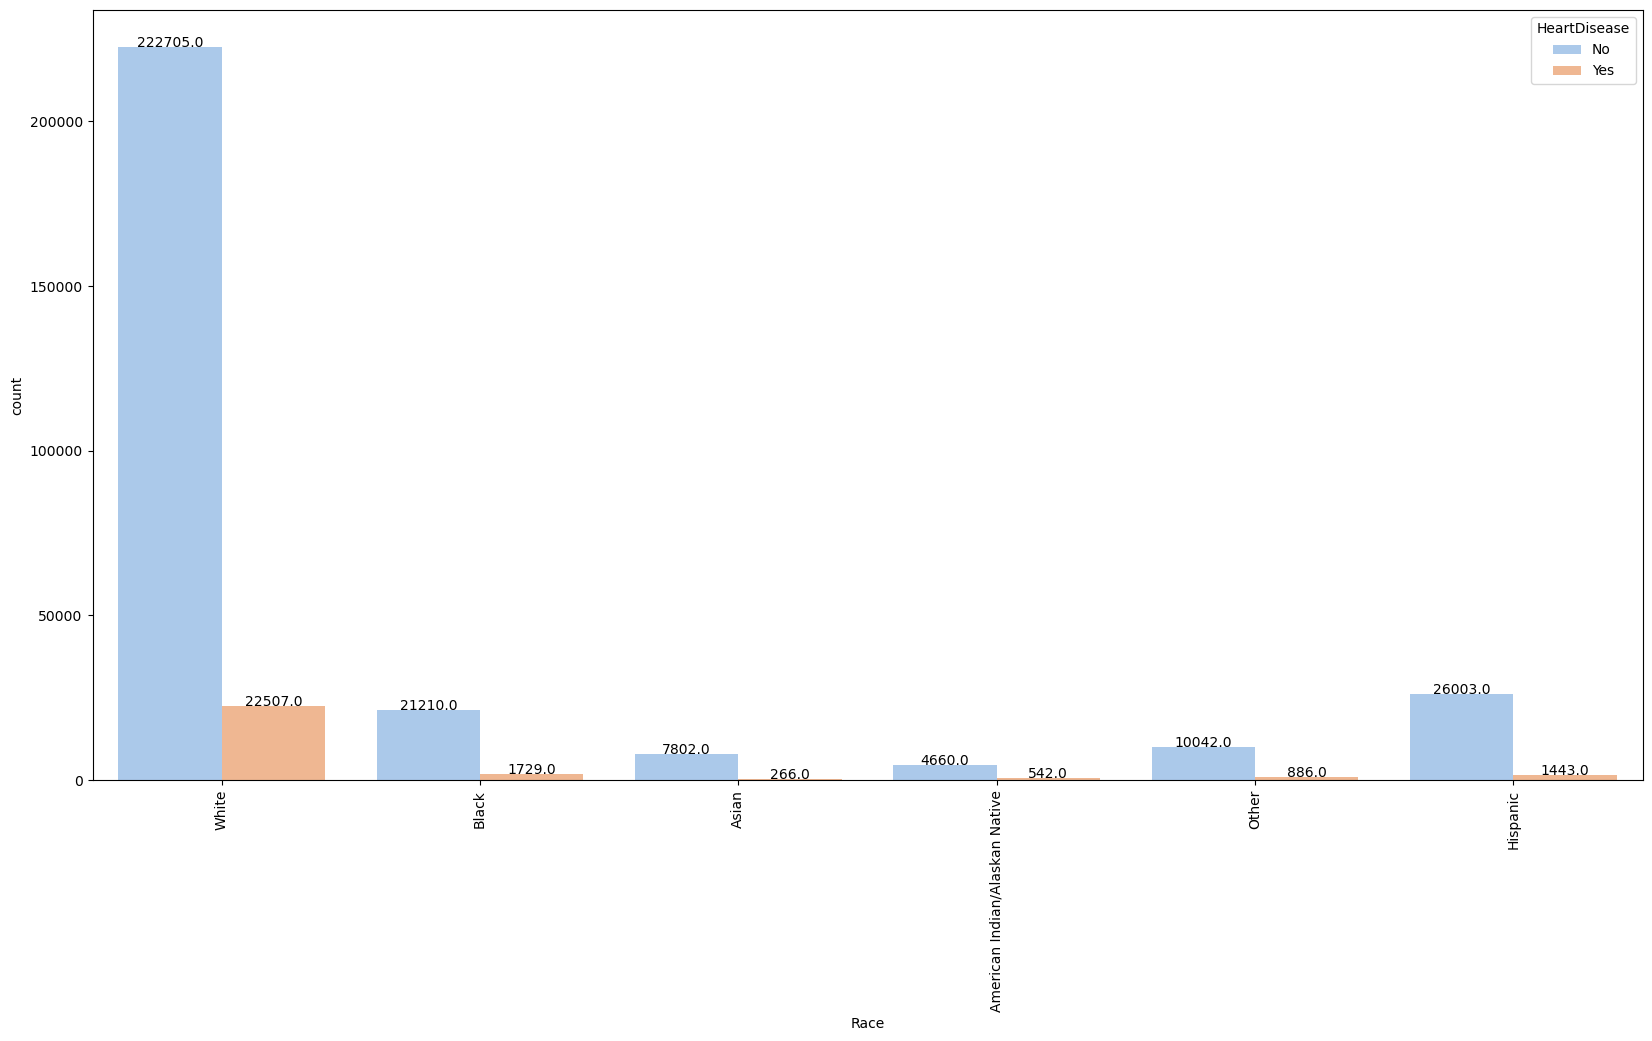

In [274]:
categorical_features = []
categorical_features.extend(ordinal_categorical_features)
categorical_features.extend(nominal_categorical_features)
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = train,hue='HeartDisease',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<h3>Data Discretization<h3>

Data discretization is a useful technique in data preprocessing, where continuous variables are transformed into discrete intervals or bins.The cut function helps to divide the continuous data into discrete bins, making it easier to analyze or prepare for certain types of machine learning algorithms.It is used for equal width binning.

In [275]:
for feature in numeric_features:
    train[feature] = pd.cut(train[feature], bins=30, labels=False, include_lowest=True)  

<h3>Data cleaning<h3>

Removal of duplicates

In [276]:
train.drop_duplicates(inplace=True)

Managing NULL values(Nan)

In [277]:
train.isnull().values.any()

False


A boxplot is a graphical representation of data distribution that shows the spread and skewness of the data. It is particularly useful for identifying outliers, comparing distributions between groups, and observing key summary statistics.

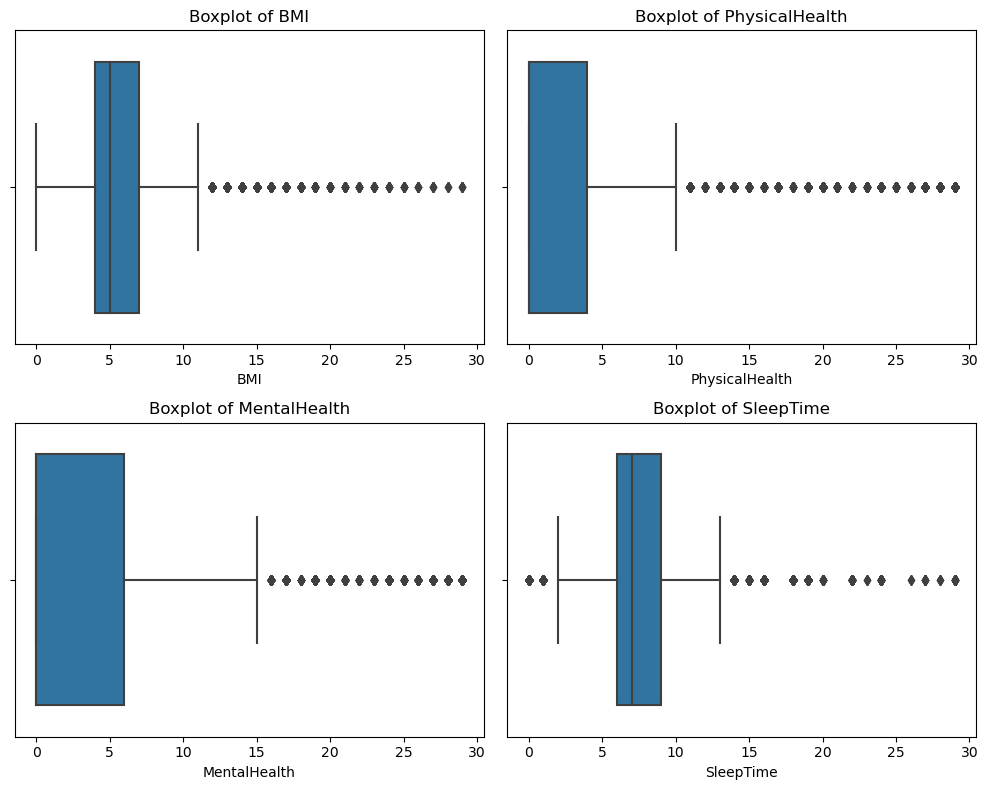

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=train, x=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

<h3>Data Transformation<h3>

<h4>Data Smoothing<h4>

An Exponential Moving Average (EMA) is a technique used for data smoothing that gives greater weight to recent data points, making it responsive to recent changes while also reducing the impact of older data.
EMA t = α⋅x t+(1−α)⋅EMA t−1


In [279]:
for feature in numeric_features:
    train[feature] = train[feature].ewm(alpha=0.3).mean()

<h4>Data Aggregation<h4>

Data aggregation is a process where multiple data points are combined to provide a summary, often for analysis, reporting, or data simplification.

<class 'pandas.core.frame.DataFrame'>
Index: 212413 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      212413 non-null  object 
 1   BMI               212413 non-null  float64
 2   Smoking           212413 non-null  object 
 3   AlcoholDrinking   212413 non-null  object 
 4   Stroke            212413 non-null  object 
 5   PhysicalHealth    212413 non-null  float64
 6   MentalHealth      212413 non-null  float64
 7   DiffWalking       212413 non-null  object 
 8   Sex               212413 non-null  object 
 9   AgeCategory       212413 non-null  object 
 10  Race              212413 non-null  object 
 11  Diabetic          212413 non-null  object 
 12  PhysicalActivity  212413 non-null  object 
 13  GenHealth         212413 non-null  object 
 14  SleepTime         212413 non-null  float64
 15  Asthma            212413 non-null  object 
 16  KidneyDisease     212413 

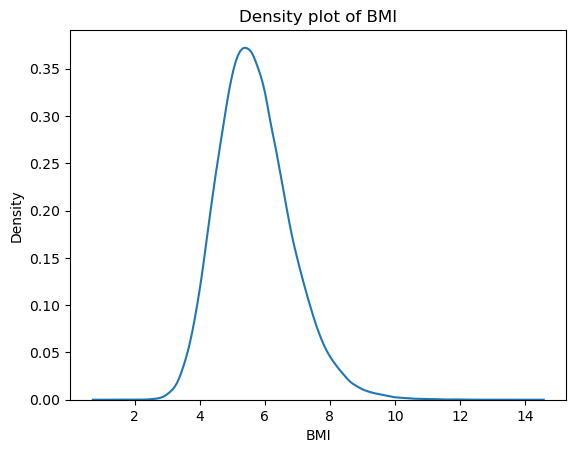

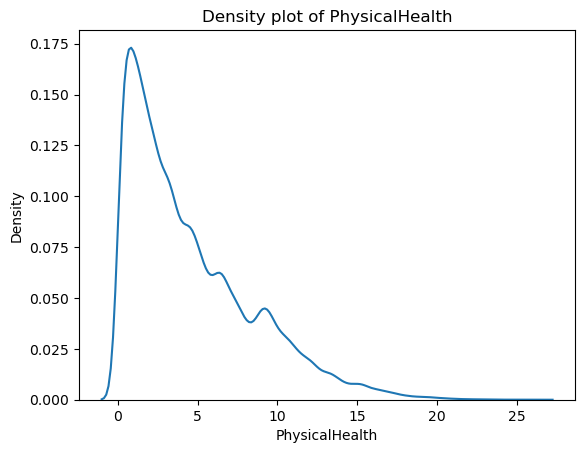

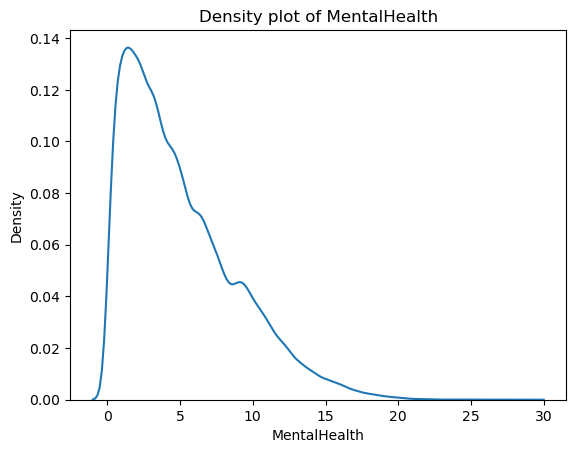

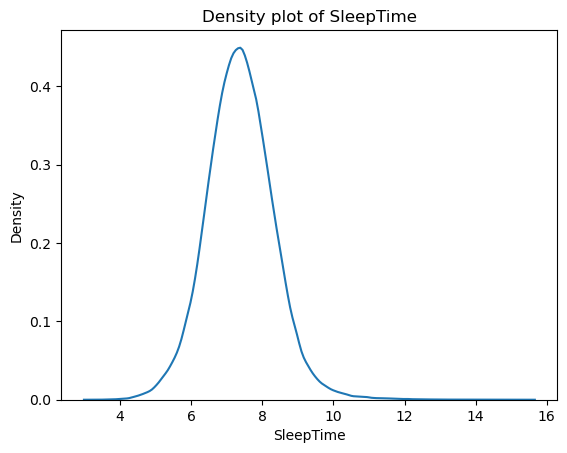

In [280]:
print(train.info())

print(train.describe())

for feature in numeric_features:
    sns.kdeplot(train[feature])
    plt.title(f'Density plot of {feature}')
    plt.show()

<h4>Ordinal encoding and Onehot encoding<h4>

In [281]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(train[ordinal_categorical_features])
train[ordinal_categorical_features] = enc.transform(train[ordinal_categorical_features])

train = pd.get_dummies(train, columns=nominal_categorical_features,dtype='int')

print(train)

        HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                0.0  1.000000      1.0              0.0     0.0   
1                0.0  2.176471      0.0              0.0     1.0   
2                0.0  3.465753      1.0              0.0     0.0   
3                0.0  3.676668      0.0              0.0     0.0   
4                0.0  3.793264      0.0              0.0     0.0   
...              ...       ...      ...              ...     ...   
319787           0.0  7.085094      0.0              0.0     0.0   
319790           1.0  6.459566      1.0              0.0     0.0   
319791           0.0  6.321696      1.0              0.0     0.0   
319793           0.0  6.525187      0.0              0.0     0.0   
319794           0.0  8.167631      0.0              0.0     0.0   

        PhysicalHealth  MentalHealth  DiffWalking  AgeCategory  Diabetic  ...  \
0             2.000000     29.000000          0.0          7.0       2.0  ...   
1             0.82352

<h4>Data Normalization<h4>

Z-score normalization, is a data preprocessing technique used to transform the features in a dataset so they have a mean of zero and a standard deviation of one. This is especially useful in machine learning and statistical analysis because it helps ensure that each feature contributes equally to the model and avoids issues with scale differences between features.

In [282]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ntrain = scaler.fit_transform(train)
print(ntrain)

[[-0.36378275 -4.16500728  1.08474648 ... -0.33802756 -0.22179139
   0.64805664]
 [-0.36378275 -3.12137687 -0.92187439 ... -0.33802756 -0.22179139
   0.64805664]
 [-0.36378275 -1.97767232  1.08474648 ... -0.33802756 -0.22179139
   0.64805664]
 ...
 [-0.36378275  0.55579406  1.08474648 ...  2.95833864 -0.22179139
  -1.54307501]
 [-0.36378275  0.73630818 -0.92187439 ...  2.95833864 -0.22179139
  -1.54307501]
 [-0.36378275  2.19329683 -0.92187439 ...  2.95833864 -0.22179139
  -1.54307501]]


<h3>Data Reduction<h3>

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variance (information) as possible.

In [283]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8) 
ntrain = pca.fit_transform(ntrain)
print("shape : ",ntrain.shape,end='\n\n')
print(ntrain)

shape :  (212413, 8)

[[ 0.62429556  1.3139925  -1.79044306 ... -0.73326365 -3.31390931
  -0.08585326]
 [ 0.53313744  1.04892515 -1.44833977 ... -1.0143527  -1.45305717
  -1.05045815]
 [ 0.92520877 -1.15401455  0.06259398 ... -0.24542841 -1.26090233
  -0.19777607]
 ...
 [-2.11562727 -1.26542313  1.41605429 ...  1.40010638 -0.15885652
   1.92015161]
 [-2.10294305  1.5724207   1.25853799 ...  2.78086087  1.28357701
   0.60484612]
 [-1.15809535  1.43496984  1.04622393 ...  2.30748333  1.35026227
   1.24408103]]


<h3>Correlation Analysis<h3>

Pearson Correlation Coefficient: Measures the linear relationship between two continuous variables. It's the most commonly used correlation coefficient and assumes that the relationship between the variables is linear and that the data is normally distributed.

Formula : E(x,y)/(std(x)*std(y))  ; x and y are features

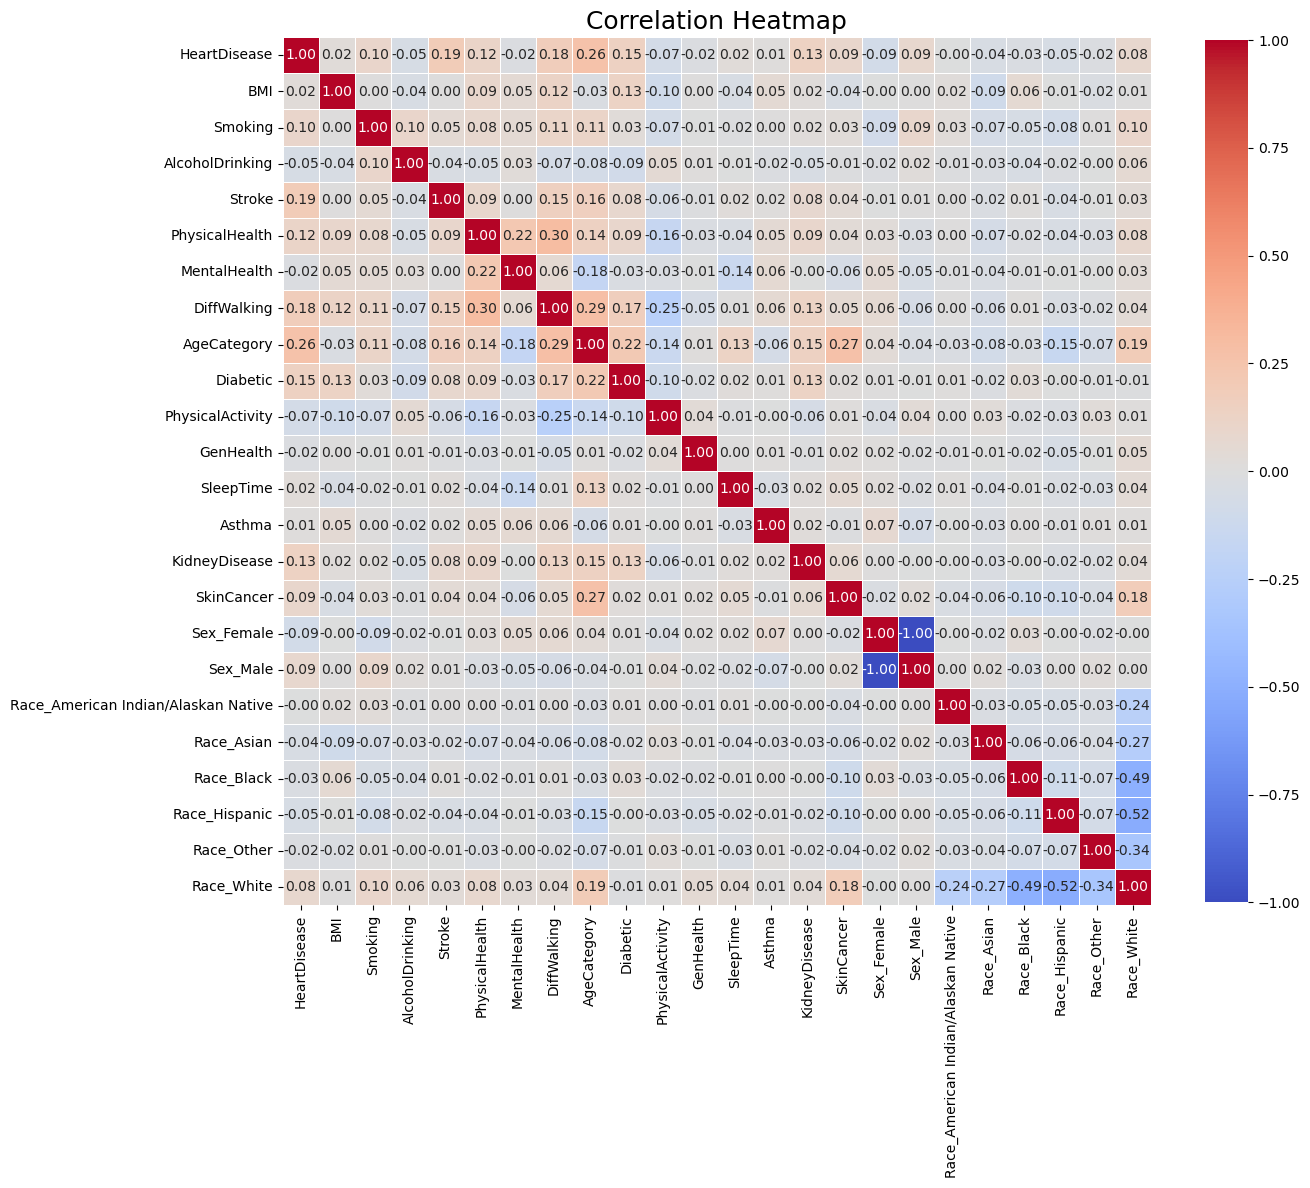

In [284]:
correlation = train.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

<h2>Model Deployment<h2>

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,confusion_matrix
from sklearn.metrics import f1_score

In [286]:
y=train['HeartDisease']
train.drop('HeartDisease',axis=1,inplace=True)

In [287]:
X_train, X_test, y_train, y_test=train_test_split(ntrain,y,test_size=0.1)

 K-Nearest Neighbors (KNN)
 
 K-Nearest Neighbors (KNN) is a simple, non-parametric, and lazy learning algorithm. It classifies new data points based on the majority class of its nearest neighbors in the feature space.
 
 
 Logistic Regression
 
 Logistic Regression is a statistical method for binary classification that predicts the probability of a data point belonging to a particular class. It models the relationship between the independent variables and the log-odds of the dependent variable.

model: KNeighborsClassifier()
Accuracy_score: 0.97
Precission_score: 0.86
Recall_score: 0.83
F1-score: 0.85


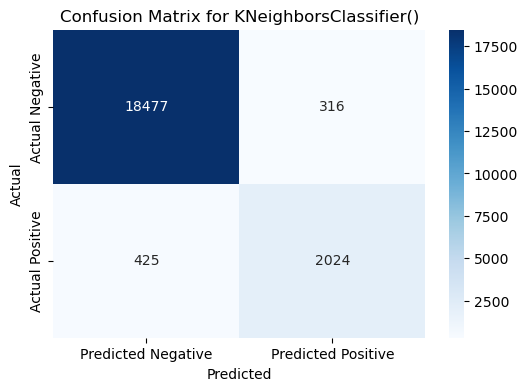



------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.92
Precission_score: 0.70
Recall_score: 0.49
F1-score: 0.58


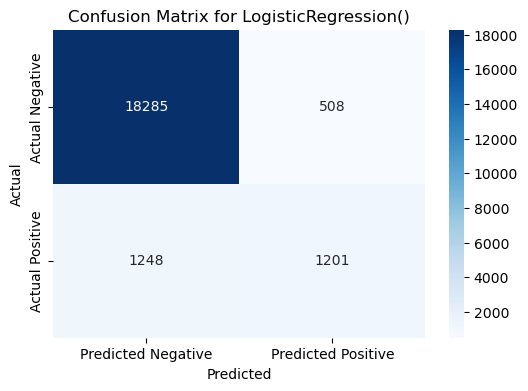



------------------------------ 



In [288]:
models = [KNeighborsClassifier(), LogisticRegression()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred):.2f}')
    print(f'Precission_score: {precision_score(y_test,y_pred):.2f}')
    print(f'Recall_score: {recall_score(y_test,y_pred):.2f}')
    print(f'F1-score: {f1_score(y_test,y_pred):.2f}')
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {str(m)}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print('\n')
    
    print('-'*30, '\n')
    